In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
from scipy import optimize, interpolate
import eigentools
from eigentools import CriticalFinder
from matplotlib import transforms

In [32]:
grid_name = "Ta1e4_grid.h5"
# grid_name = "rb_eigen_stress_free.h5"
with h5.File(grid_name, 'r') as f:
    parameter_grids = [k[()] for k in f.values() if 'xyz' in k.name]
    data = np.array(f['grid'])

yy = parameter_grids[1]
xx = parameter_grids[0]

grid = np.zeros(xx.shape, dtype=np.complex128)
grid = data.real

58.259664377399474


Text(0, 0.5, 'Ra')

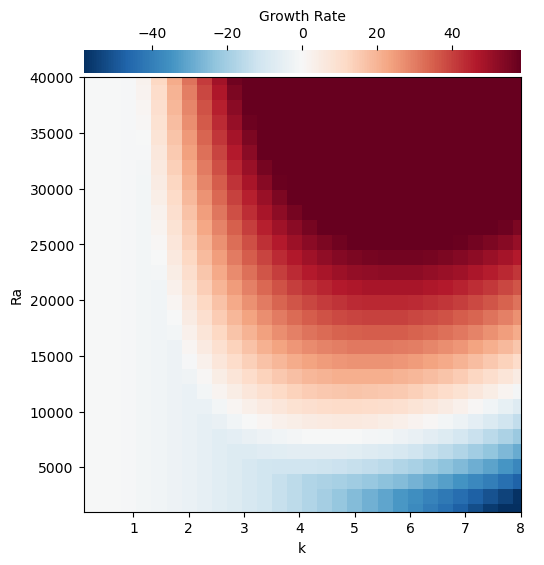

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

biggest_val = 2*np.abs(grid).std()
print(biggest_val)
cbbox = transforms.Bbox.from_bounds(0.03, 0.95, 0.94, 0.05)
pbbox = transforms.Bbox.from_bounds(0.03, 0, 0.94, 0.94)

to_axes_bbox = transforms.BboxTransformTo(ax.get_position())
cbbox = cbbox.transformed(to_axes_bbox)
pbbox = pbbox.transformed(to_axes_bbox)
cax = ax.figure.add_axes(cbbox)
pax = ax.figure.add_axes(pbbox)

plot = pax.pcolormesh(xx.T, yy.T, grid.T, cmap='RdBu_r', vmin=-biggest_val, vmax=biggest_val)
ax.axis('off')
cbar = plt.colorbar(plot, cax=cax, label="Growth Rate", orientation='horizontal')
cbar.outline.set_visible(False)
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_label_position('top')

pax.set_ylim(yy.min(), yy.max())
pax.set_xlim(xx.min(), xx.max())
pax.set_xlabel('k')
pax.set_ylabel('Ra')